In [8]:
import numpy as np
import matplotlib.pyplot as plt




In [9]:
def logistic(r, x):
    return r * x * (1 - x)

<IPython.core.display.Javascript object>


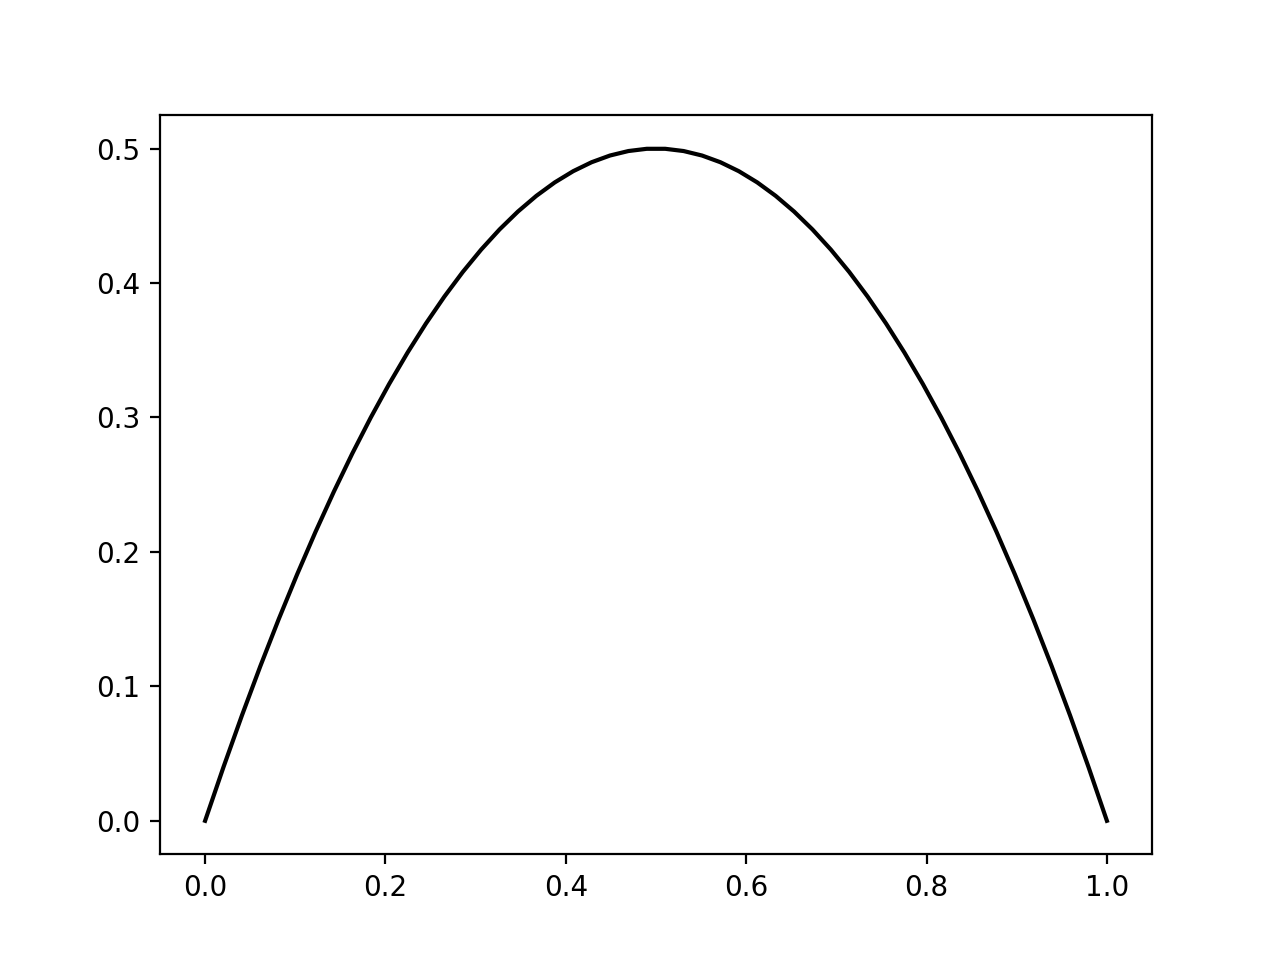

In [10]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

In [11]:
def plot_system(r, x0, n, ax=None):
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    x = x0
    for i in range(n):
        y = logistic(r, x)
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
     
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


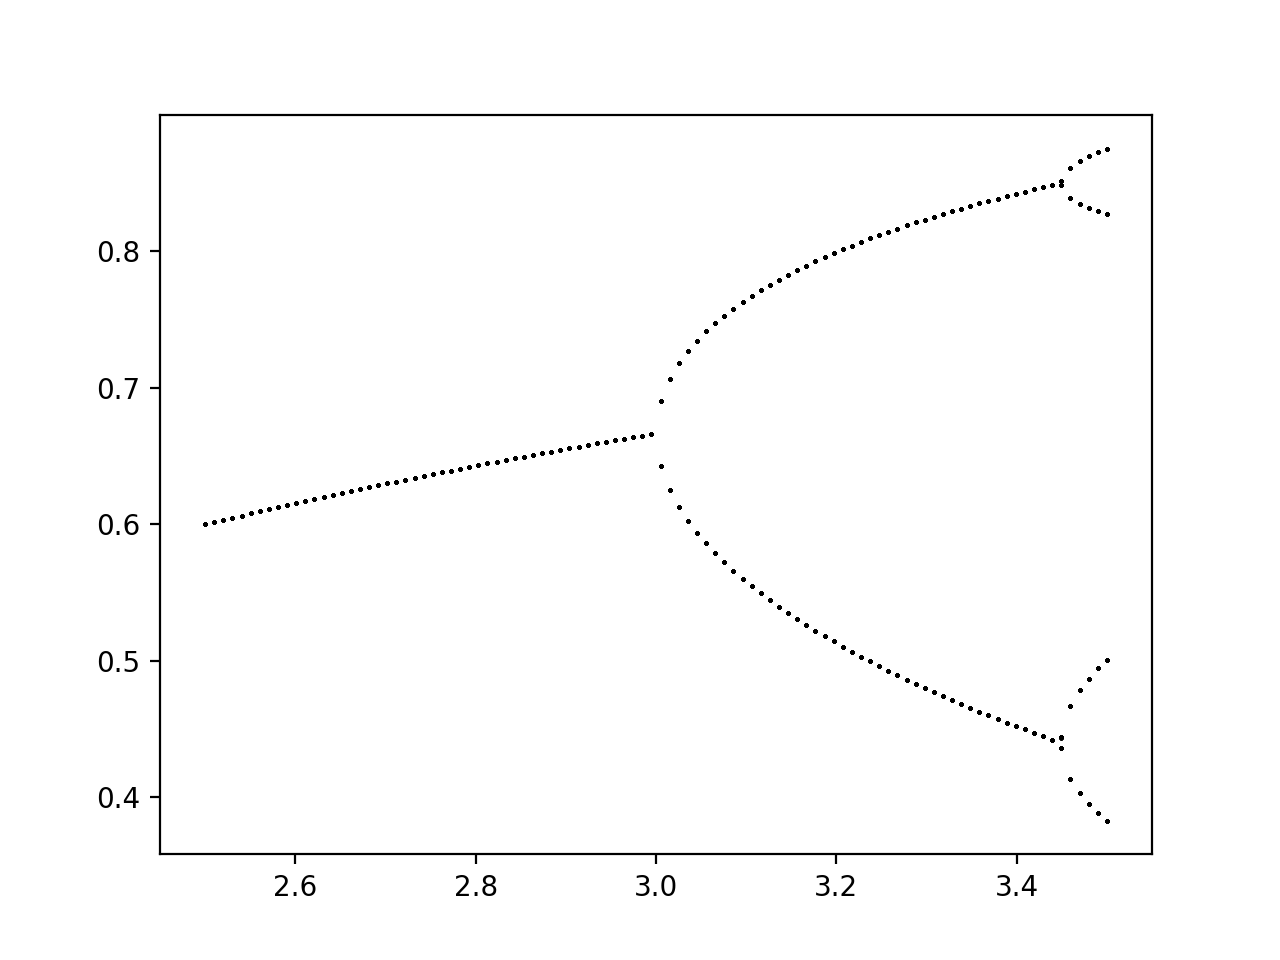

In [12]:
%matplotlib notebook
N = 1000
x = 0.5+np.zeros(N)
lambda_c = np.linspace(2.5, 3.5, 100)
endcap = np.arange(round(N*0.9), N)

for ri in range(len(lambda_c)):
    for n in range(N-1):
        x[n+1] = lambda_c[ri]*x[n]*(1 - x[n])
    u = x[endcap]
    r = lambda_c[ri]*np.ones(len(u))
    plt.plot(r, u, 'k.', markersize=1)
plt.show()

<IPython.core.display.Javascript object>


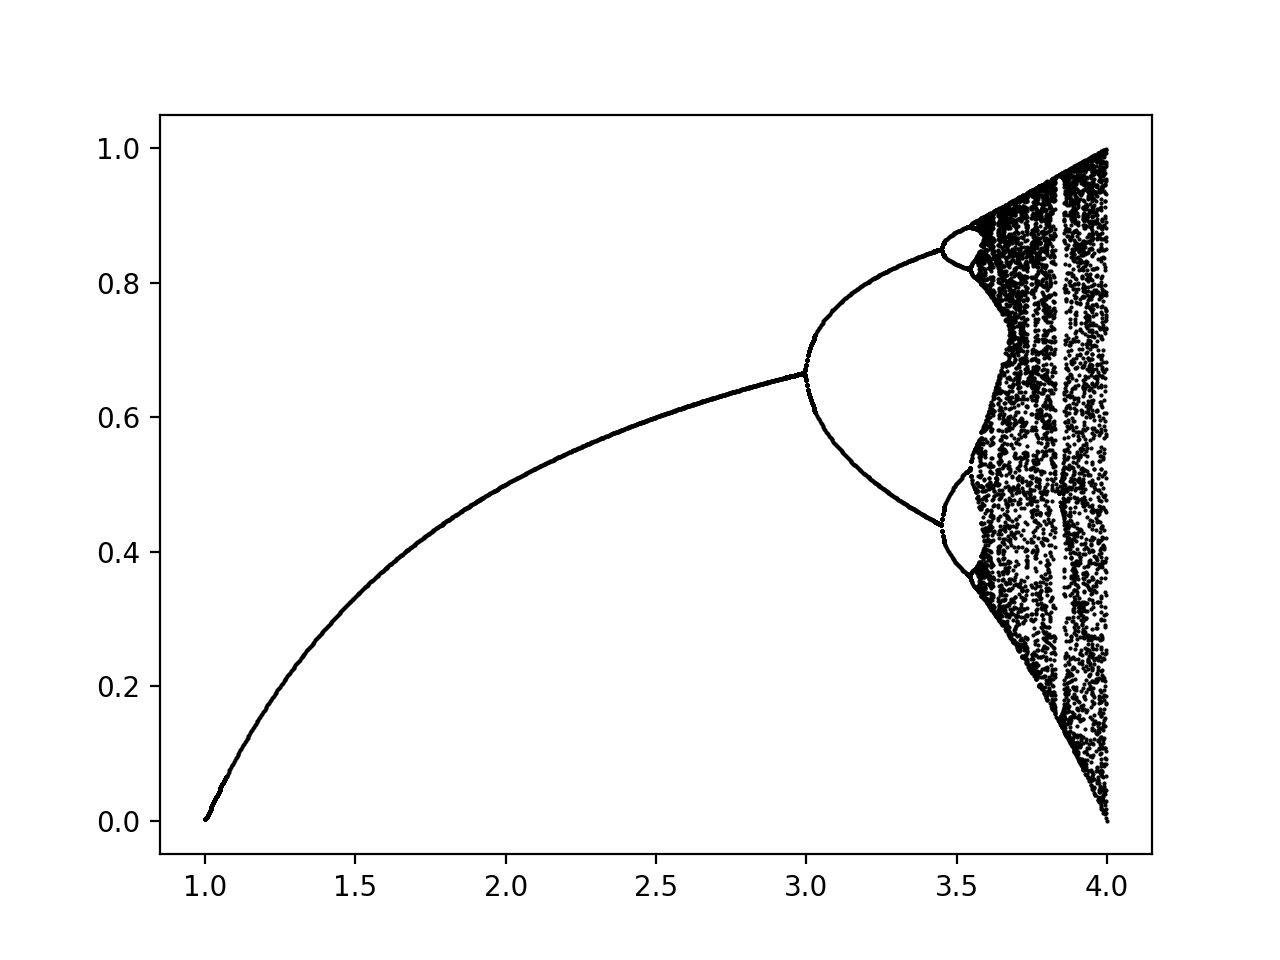

In [13]:
%matplotlib notebook
N = 500
x = 0.5+np.zeros(N)
lambda_c = np.linspace(1, 4, 1000)
endcap = np.arange(round(N*0.9), N)

for ri in range(len(lambda_c)):
    for n in range(N-1):
        x[n+1] = lambda_c[ri]*x[n]*(1 - x[n])
    u = np.unique(x[endcap])
    r = lambda_c[ri]*np.ones(len(u))
    plt.plot(r, u, 'k.', markersize=1)
plt.show()

<IPython.core.display.Javascript object>


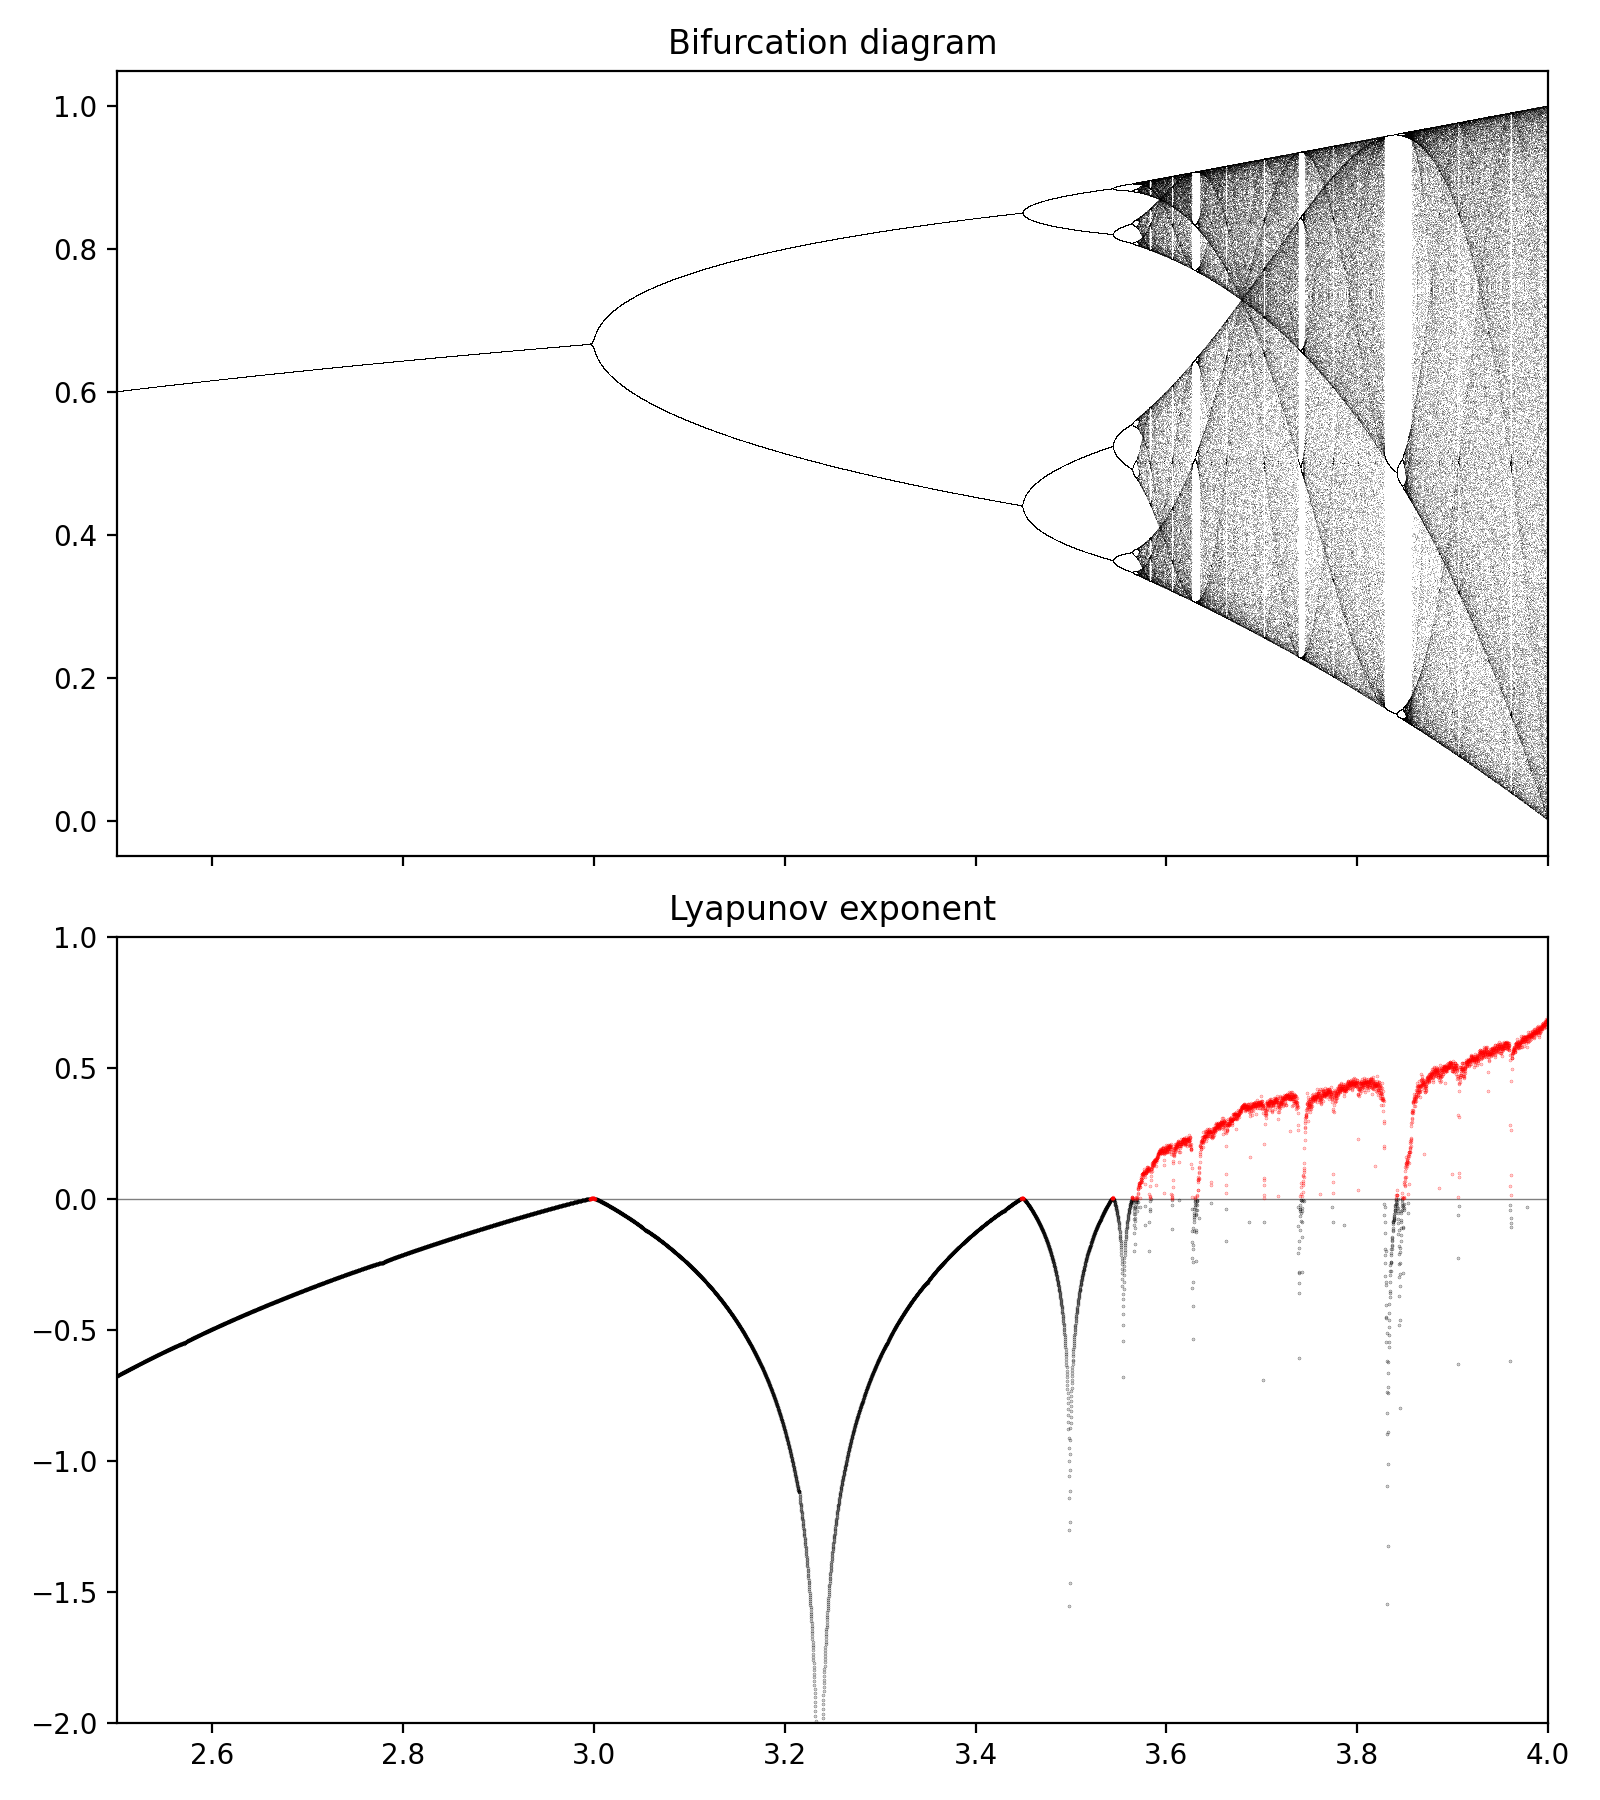

In [14]:
n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    lyapunov += np.log(abs(r - 2 * r * x))
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

ax2.axhline(0, color='k', lw=.5, alpha=.5)
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()